# Teste de Shapiro-Wilk

O teste de Shapiro-Wilk é uma técnica estatística utilizada para verificar se uma amostra de dados segue uma distribuição normal.
Ele avalia a hipótese nula de que os dados foram retirados de uma população com distribuição normal. O teste é baseado na comparação entre os quantis observados e os quantis esperados de uma distribuição normal teórica.

\
$$H_0 : A~amostra~provem~de~uma~população~com~distribuição~normal$$
\
$$H_1 : A~amostra~não~provem~de~uma~população~com~distribuição~normal$$

A fórmula do Teste de Shapiro-Wilk é:

$$W_{calc}=\frac{b^2}{\sum_{i=1}^{n}(X_i-\overline{X})^2}\quad para\quad i=1,...,n\\
b= \sum_{i}^{\frac{n}{2}}a_{i,n}(X_{(n-i-1)}-X_{(i)})$$

Sendo:

$Xi$ é a i-ésima observação da amostra.

$\overline{X}$ é a média da amostra.

$a_{i,n}$ são os coeficientes calculados a partir da matriz de covariância dos valores ordenados de uma distribuição normal.

$X_{i}$ O primeiro menor valor entre os valores ordenados

$X_{(i)}$ O primeiro valor da amostra

## Importação de Bibliotecas

In [96]:
pip install --upgrade openpyxl

In [97]:
import pandas as pd
import numpy as np
import random
import statistics
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm

## Amostragem

*Escolha das amostras*

Distribuição Binomial

Distribuição Normal

Distribuição Poisson

Distribuição Lognormal

Amostra aleatória (sem especificação de distribuição)

In [98]:
# Definir a semente para garantir a reprodutibilidade
seeds = list(range(10))
numeros = list(range(7,19))

size_amostra = 10

# Listas para armazenar as amostras geradas
amostras_aleatorias = [] #amostra aleatória simples
amostras_lognormal = []
amostras_binomial = []
amostras_poisson = []
amostras_normal = []

# Gerar as amostras com seeds diferentes
for seed in seeds:
    random_state = np.random.RandomState(seed)
    amostra_aleatoria = random_state.choice(numeros, size_amostra)  # Amostra aleatória de 10 números
    amostra_lognormal = random_state.lognormal(25, 2, size_amostra)  # Distribuição log-normal com média 0 e desvio padrão 1
    amostra_binomial = random_state.binomial(10, 0.5, size_amostra)  # Distribuição binomial com 10 tentativas e probabilidade de sucesso 0.5
    amostra_poisson = random_state.poisson(2, size_amostra)  # Distribuição de Poisson com lambda = 2
    amostra_normal = random_state.normal(6, 1.5, size_amostra)  # Distribuição normal

    amostras_aleatorias.append(amostra_aleatoria)
    amostras_lognormal.append(amostra_lognormal)
    amostras_binomial.append(amostra_binomial)
    amostras_poisson.append(amostra_poisson)
    amostras_normal.append(amostra_normal)

In [99]:
def transforma_lista_em_dataframe(amostra):
    df = pd.DataFrame(amostra)
    df.columns = ['X_i']
    df = df.sort_values(by='X_i').reset_index(drop=True)
    return df

In [100]:
lista = [amostras_aleatorias, amostras_lognormal, amostras_binomial, amostras_poisson, amostras_normal]

amostra_da_vez = lista[0][2]
df = transforma_lista_em_dataframe(amostra_da_vez)
df

,X_i
0,8
1,9
2,9
3,13
4,14
5,15
6,15
7,15
8,18
9,18


## Calculando Dcalc

In [101]:
coeficient_table = pd.read_csv('Shapiro-Wilk-Tables.csv')
coeficient_table

,n =,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,a1,0.7071,0.7071,0.6872,0.6646,0.6431,0.6233,0.6052,0.5888,0.5739,...,0.3940,0.3917,0.3894,0.3872,0.3850,0.3830,0.3808,0.3789,0.3770,0.3751
1,a2,0.0000,0.0000,0.1677,0.2413,0.2806,0.3031,0.3164,0.3244,0.3291,...,0.2719,0.2701,0.2684,0.2667,0.2651,0.2635,0.2620,0.2604,0.2589,0.2574
2,a3,0.0000,0.0000,0.0000,0.0000,0.0875,0.1401,0.1743,0.1976,0.2141,...,0.2357,0.2345,0.2334,0.2323,0.2313,0.2302,0.2291,0.2281,0.2271,0.2260
3,a4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0561,0.0947,0.1224,...,0.2091,0.2085,0.2078,0.2072,0.2065,0.2058,0.2052,0.2045,0.2038,0.2032
4,a5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0399,...,0.1876,0.1874,0.1871,0.1868,0.1865,0.1862,0.1859,0.1855,0.1851,0.1847
5,a6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.1693,0.1694,0.1695,0.1695,0.1695,0.1695,0.1695,0.1693,0.1692,0.1691
6,a7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.1531,0.1535,0.1539,0.1542,0.1545,0.1548,0.1550,0.1551,0.1553,0.1554
7,a8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.1384,0.1392,0.1398,0.1405,0.1410,0.1415,0.1420,0.1423,0.1427,0.1430
8,a9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.1249,0.1259,0.1269,0.1278,0.1286,0.1293,0.1300,0.1306,0.1312,0.1317
9,a10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.1123,0.1136,0.1149,0.1160,0.1170,0.1180,0.1189,0.1197,0.1205,0.1212


In [102]:
df['X_i']

0     8
1     9
2     9
3    13
4    14
5    15
6    15
7    15
8    18
9    18
Name: X_i, dtype: int64

In [103]:
# Calculando b
def calcular_b(n,df):
    n = 10
    n_sobre_2 = int(n/2)
    b = 0

    for i in range(n_sobre_2):
        a = coeficient_table.iloc[i,n-1]
        dif = (df['X_i'][n-i-1]-df['X_i'][i])
        b += a*dif
    return b

#media
media = amostras_aleatorias[0].mean()
media

#wcalc
def Wcalc(b,amostra, df):

    numerador = np.power(b,2)

    denominador = sum([(amostra[i] - media)**2 for i in range(len(df))])

    Wcalc = numerador/denominador

    return Wcalc


## Valor crítico
n = 10 e a = 1% (0.01)

Olhando na tabela,
Wc = 0.781

In [104]:
Wc = 0.781
def verificar_hipotese(Wcalc,Wc):
    if Wcalc > Wc:
        print(f"{Wcalc} > {Wc:.3f}")
        print("A hipótese nula é aceita, logo os dados são normais")
    else:
        print(f"{Wcalc} < {Wc:.3f}")
        print("A hipótese nula é rejeitada, logo os dados não são normais")

#Utilizando a biblioteca Stats do Scipy

In [105]:
def funcao_shapiro(amostra):
    res = stats.shapiro(amostra)
    return res

In [106]:
# Amostra de dados
amostra = [12, 7, 10, 18, 10, 14, 16, 10, 12, 9]

# Teste de Shapiro-Wilk
stat_teste, p_valor = shapiro(amostra)

# Imprime o valor estatístico de teste e o valor p
print("Valor estatístico de teste (W):", stat_teste)
print("Valor p (p-valor):", p_valor)

Valor estatístico de teste (W): 0.9446598887443542
Valor p (p-valor): 0.6059272885322571


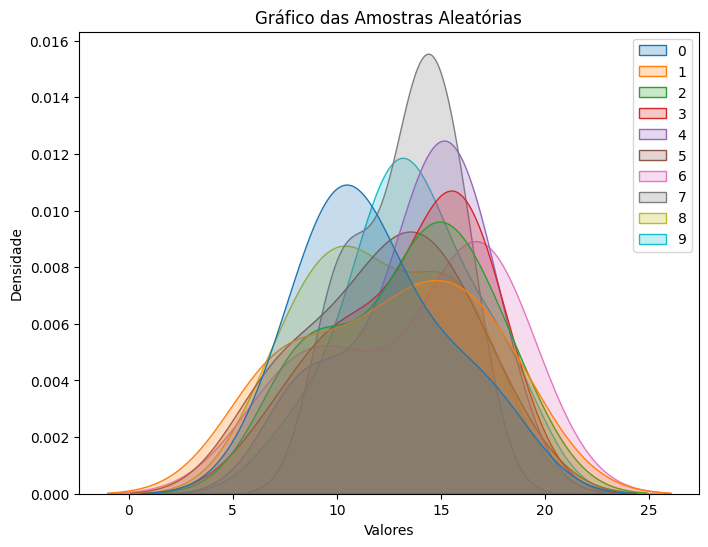

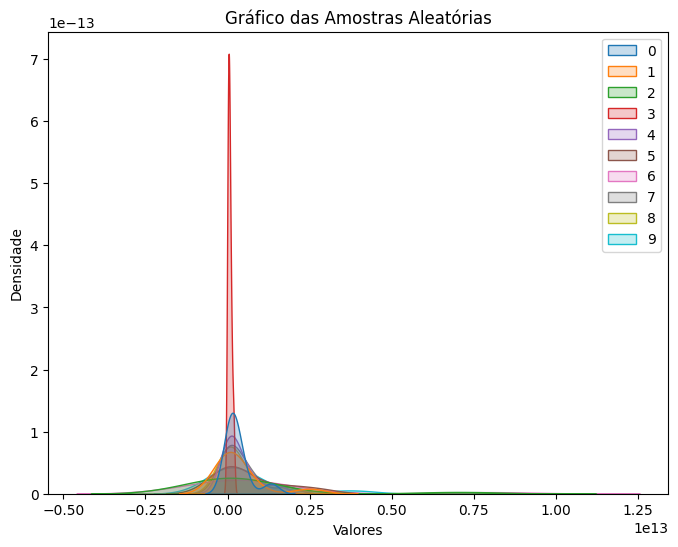

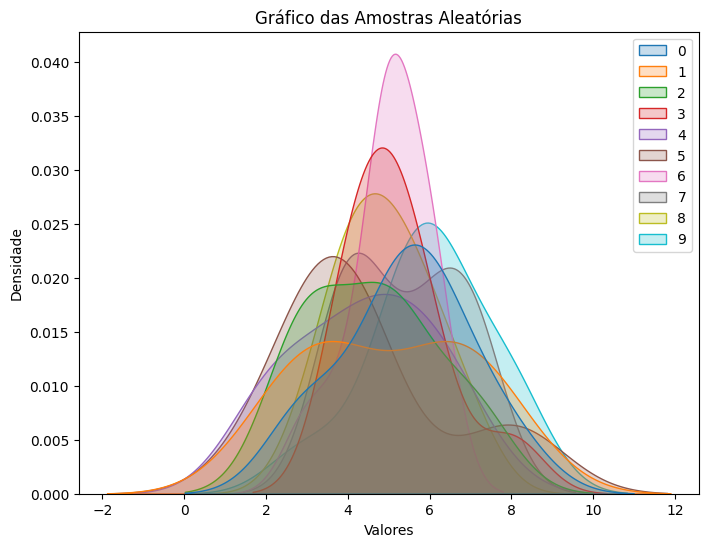

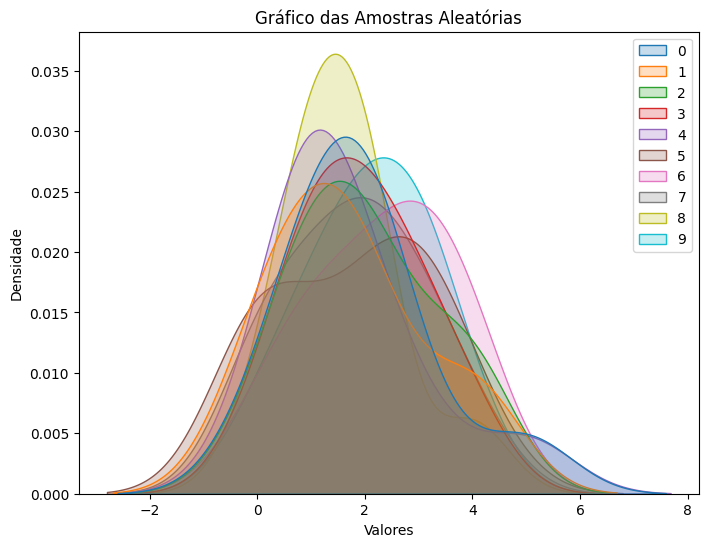

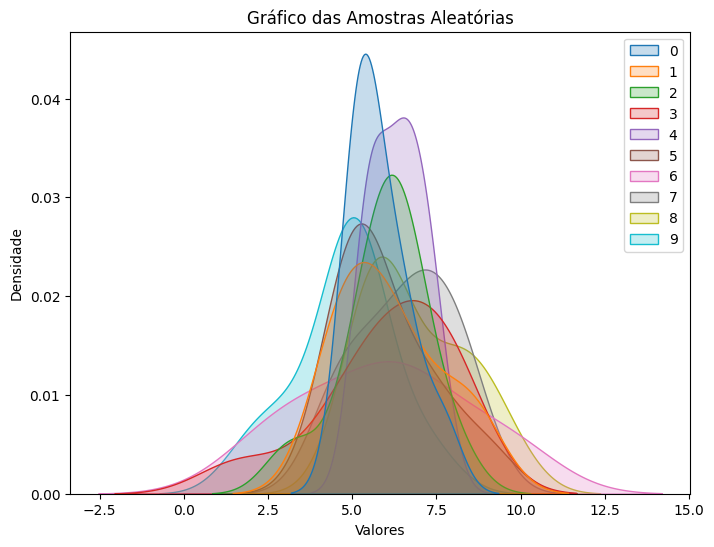

In [109]:
#gráfico das amostras aleatórias
plt.figure(figsize=(8, 6))
sns.kdeplot(data=amostras_aleatorias, fill=True)
plt.title('Gráfico das Amostras Aleatórias')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.show()

#gráfico das amostras lognormais
plt.figure(figsize=(8, 6))
sns.kdeplot(data=amostras_lognormal, fill=True)
plt.title('Gráfico das Amostras Aleatórias')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.show()

#gráfico das amostras binomiais
plt.figure(figsize=(8, 6))
sns.kdeplot(data=amostras_binomial, fill=True)
plt.title('Gráfico das Amostras Aleatórias')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.show()


#gráfico das amostras de poisson
plt.figure(figsize=(8, 6))
sns.kdeplot(data=amostras_poisson, fill=True)
plt.title('Gráfico das Amostras Aleatórias')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.show()

#gráfico das amostras normais
plt.figure(figsize=(8, 6))
sns.kdeplot(data=amostras_normal, fill=True)
plt.title('Gráfico das Amostras Aleatórias')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.show()